## Binary Classification: Titanic Dataset
https://www.kaggle.com/c/titanic

** Dataset Information: **

891 passenger information aboard the Titanic

** Attribute Information: (9 features and 1 class)**


Variable	Definition	     Key
1. survival	Survival	     0 = No, 1 = Yes
2. pclass	Ticket class	 1 = 1st, 2 = 2nd, 3 = 3rd
3. sex	    Sex	
4. Age	    Age in years	
5. sibsp	# of siblings / spouses aboard the Titanic	
6. parch	# of parents / children aboard the Titanic	
7. ticket	Ticket number	
8. fare	    Passenger fare	
9. cabin	Cabin number	
10. embarked Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

** Objective of this project **

predict whether a passenger survived the sinking of the Titanic or not

## Data

In [137]:
options(warn=-1)
# Load Data
df  <- read.csv('train.csv')

In [138]:
# Inspect Data
head(df,3)
colnames(df)[2] <- 'label' #'Survived' class -> label

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S


In [139]:
dim(df)

[1] 891  12

In [140]:
str(df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ label      : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [141]:
summary(df)

  PassengerId        label            Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [142]:
table(df$label) #imbalanced labels


  0   1 
549 342 

In [143]:
any(is.na(df))

[1] TRUE

## Data preprocessing

** Missing Data **

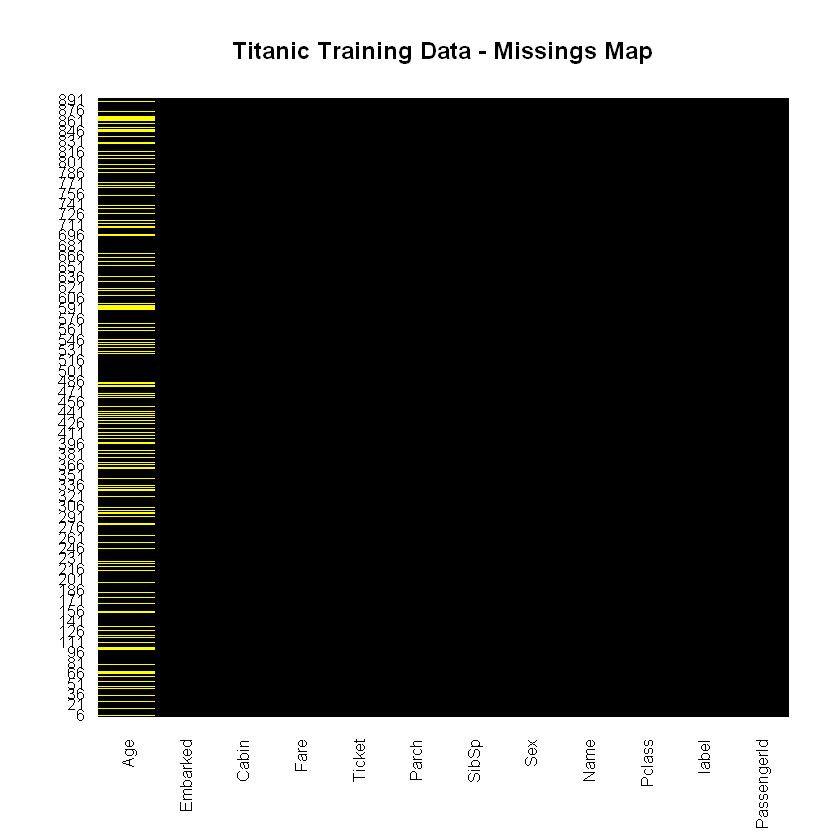

In [144]:
library(Amelia)
missmap(df, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=FALSE)

** Clean Data **

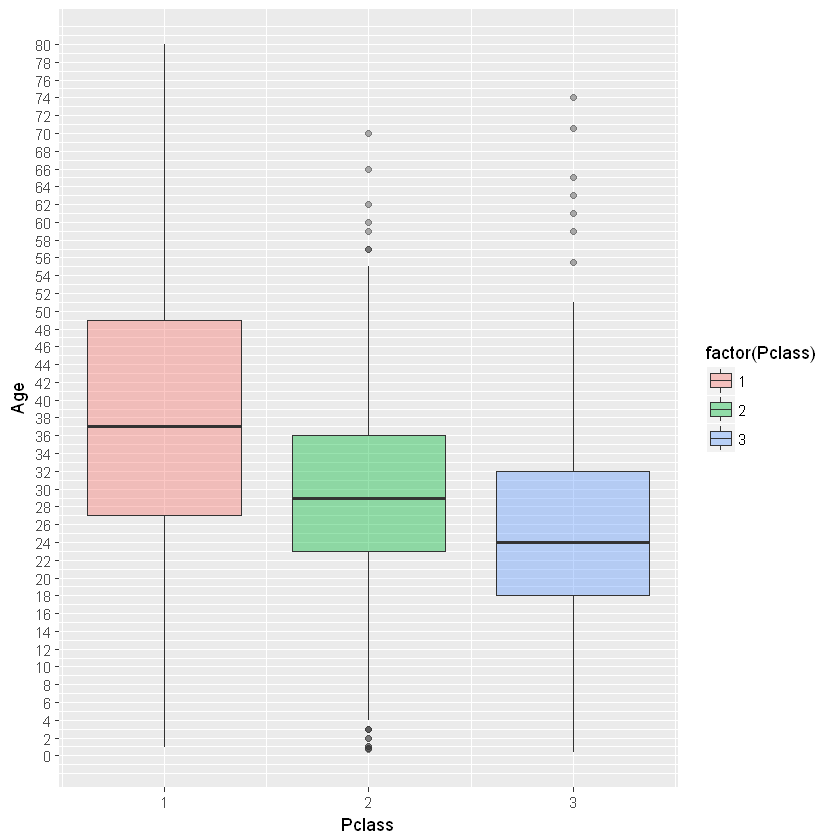

In [145]:
# Passenger: imputed with the average age by Pclass
library(ggplot2)
ggplot(df,aes(Pclass,Age)) + 
    geom_boxplot(aes(group=Pclass, fill=factor(Pclass)), alpha=0.4) +
    scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

In [146]:
impute_age <- function(age,class){
    out <- age
    for (i in 1:length(age)){
        
        if (is.na(age[i])){

            if (class[i] == 1){
                out[i] <- 38

            }else if (class[i] == 2){
                out[i] <- 30

            }else{
                out[i] <- 25
            }
        }else{
            out[i]<-age[i]
        }
    }
    return(out)
}

df$Age <- impute_age(df$Age,df$Pclass)

In [147]:
# drop columns
library(dplyr)
df <- select(df, -PassengerId, -Name, -Ticket, -Cabin)
any(is.na(df))

[1] FALSE

** Encode Categorical Variables **

In [148]:
str(df)

'data.frame':	891 obs. of  8 variables:
 $ label   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 25 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [149]:
df$label <- factor(df$label)
df$Pclass <- factor(df$Pclass)
df$Parch <- factor(df$Parch)
df$SibSp <- factor(df$SibSp)
str(df)

'data.frame':	891 obs. of  8 variables:
 $ label   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 25 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : Factor w/ 7 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 3 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


** Split Train Test Sets **

In [150]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

In [151]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [152]:
# standardize data
label_col  = 1
train_set[c(4,7)] = scale(train_set[c(4,7)])
test_set[c(4,7)] = scale(test_set[c(4,7)])
summary(train_set)

 label   Pclass      Sex           Age          SibSp   Parch  
 0:439   1:171   female:254   Min.   :-2.1363   0:488   0:538  
 1:274   2:141   male  :459   1st Qu.:-0.5321   1:163   1: 97  
         3:401                Median :-0.3090   2: 23   2: 67  
                              Mean   : 0.0000   3: 13   3:  5  
                              3rd Qu.: 0.5830   4: 14   4:  2  
                              Max.   : 3.7797   5:  5   5:  3  
                                                8:  7   6:  1  
      Fare          Embarked
 Min.   :-0.66129    :  2   
 1st Qu.:-0.49823   C:136   
 Median :-0.36279   Q: 60   
 Mean   : 0.00000   S:515   
 3rd Qu.:-0.02108           
 Max.   : 9.91921           
                            

## Baseline Model

In [153]:
# cross validation
trControl <- trainControl(method="cv", number=5)
metric <- "Accuracy"


Call:
summary.resamples(object = results)

Models: lda, logistic, glmnet, svm, knn, nb, cart, c50, bagging, rf, gbm 
Number of resamples: 5 

Accuracy 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda      0.7535211 0.7757929 0.8111888 0.8055131 0.8409091 0.8461538    1
logistic 0.7676056 0.7832168 0.8321678 0.8148528 0.8391608 0.8521127    0
glmnet   0.7746479 0.7832168 0.8321678 0.8162612 0.8391608 0.8521127    0
svm      0.7412587 0.7676056 0.8028169 0.7938048 0.8251748 0.8321678    0
knn      0.7342657 0.7762238 0.8028169 0.7967399 0.8041958 0.8661972    0
nb       0.6126761 0.6153846 0.6197183 0.6199054 0.6223776 0.6293706    0
cart     0.7394366 0.7692308 0.8251748 0.8022062 0.8380282 0.8391608    0
c50      0.7816901 0.7902098 0.8251748 0.8204964 0.8321678 0.8732394    0
bagging  0.7342657 0.7605634 0.7902098 0.7994681 0.8531469 0.8591549    0
rf       0.7622378 0.7746479 0.8251748 0.8190880 0.8601399 0.8732394    0
gbm      0.7832168 0.7887324 0.83

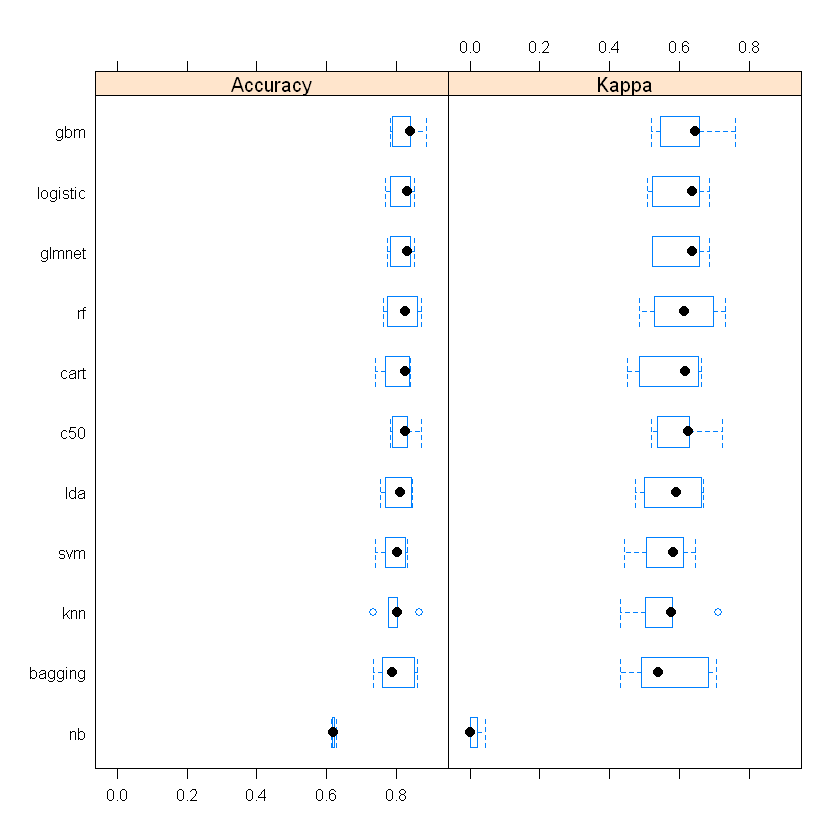

In [154]:
# train multiple models
# Linear Discriminant Analysis
set.seed(seed)
fit.lda <- train(label~., data=train_set, method="lda", 
                 metric=metric, trControl=trControl)
# Logistic Regression
set.seed(seed)
fit.glm <- train(label~., data=train_set, method="glm", 
                 metric=metric, trControl=trControl)
# GLMNET
set.seed(seed)
fit.glmnet <- train(label~., data=train_set, method="glmnet", 
                    metric=metric, trControl=trControl)
# SVM Radial
set.seed(seed)
fit.svmRadial <- train(label~., data=train_set, method="svmRadial", 
                       metric=metric, trControl=trControl, fit=FALSE)
# kNN
set.seed(seed)
fit.knn <- train(label~., data=train_set, method="knn", 
                 metric=metric, trControl=trControl)
# Naive Bayes
set.seed(seed)
fit.nb <- train(label~., data=train_set, method="nb", 
                metric=metric, trControl=trControl)
# CART
set.seed(seed)
fit.cart <- train(label~., data=train_set, method="rpart", 
                  metric=metric, trControl=trControl)
# C5.0
set.seed(seed)
fit.c50 <- train(label~., data=train_set, method="C5.0", 
                 metric=metric, trControl=trControl)
# Bagged CART
set.seed(seed)
fit.treebag <- train(label~., data=train_set, method="treebag", 
                     metric=metric, trControl=trControl)
# Random Forest
set.seed(seed)
fit.rf <- train(label~., data=train_set, method="rf", 
                metric=metric, trControl=trControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(label~., data=train_set, method="gbm", 
                 metric=metric, trControl=trControl, verbose=FALSE)

# summarise results
results <- resamples(list(lda=fit.lda, logistic=fit.glm, glmnet=fit.glmnet,
    svm=fit.svmRadial, knn=fit.knn, nb=fit.nb, cart=fit.cart, c50=fit.c50,
    bagging=fit.treebag, rf=fit.rf, gbm=fit.gbm))
summary(results)
bwplot(results)

## Parameter Tuning
4 best algorithms by mean accuracy: gbm, C50, rf, glmnet

tuning parameters: http://topepo.github.io/caret/available-models.html
https://github.com/topepo/caret/tree/master/models/files

In [155]:
trControl <- trainControl(method='cv', number=5)
metric <- 'Accuracy'

#### Model 1: Stochastic Gradient Boosting 

In [156]:
# default
fit.gbm

Stochastic Gradient Boosting 

713 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 570, 570, 570, 571, 571 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.7909682  0.5530525
  1                  100      0.7993696  0.5729695
  1                  150      0.8022161  0.5767160
  2                   50      0.7994090  0.5675012
  2                  100      0.8064611  0.5829609
  2                  150      0.8134443  0.5968237
  3                   50      0.8275190  0.6262405
  3                  100      0.8162514  0.6023848
  3                  150      0.8204767  0.6111332

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were n.trees =

Stochastic Gradient Boosting 

713 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 570, 570, 570, 571, 571 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  Accuracy   Kappa    
  0.01       1                  10               50      0.7895597  0.5489558
  0.01       1                  10              100      0.7895597  0.5489558
  0.01       1                  10              200      0.7895597  0.5489558
  0.01       1                  20               50      0.7895597  0.5489558
  0.01       1                  20              100      0.7895597  0.5489558
  0.01       1                  20              200      0.7895597  0.5489558
  0.01       3                  10               50      0.7798483  0.4851190
  0.01       3                  10              100      0.7910568  0.5312351
  0.01       3                  10              200      0.803624

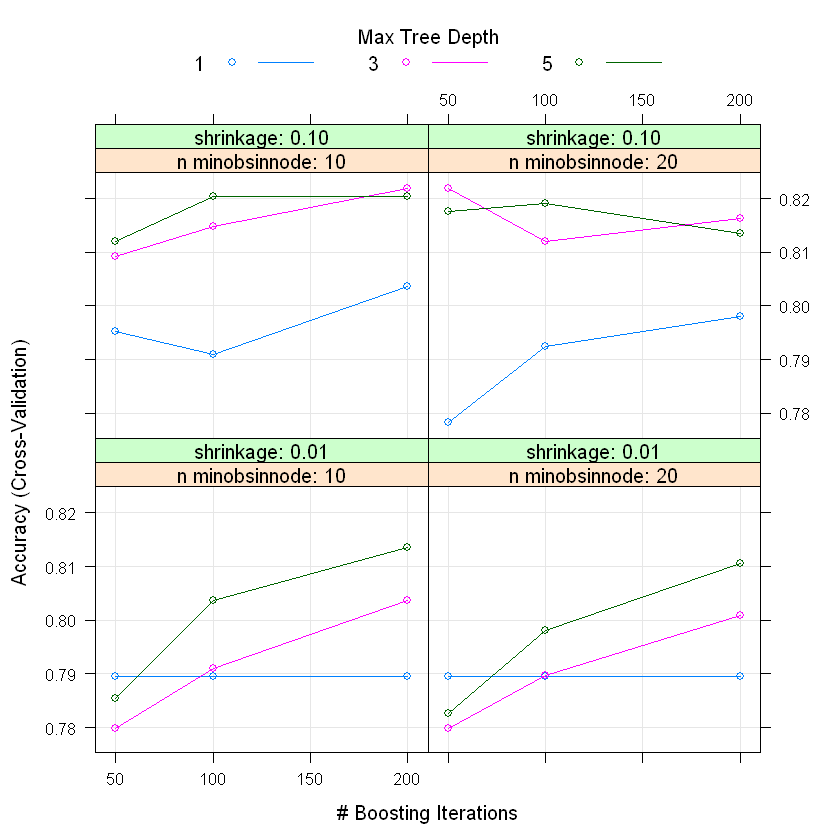

In [157]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(n.trees = c(50,100,200),
                       interaction.depth = c(1, 3, 5),
                       shrinkage = c(0.01,0.1),
                       n.minobsinnode = c(10,20))
gridSearch <- train(label~., data=train_set, method='gbm',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid, verbose=FALSE)
print(gridSearch)
plot(gridSearch)

#### Model 2: C50

In [158]:
# default
fit.c50

C5.0 

713 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 570, 570, 570, 571, 571 
Resampling results across tuning parameters:

  model  winnow  trials  Accuracy   Kappa    
  rules  FALSE    1      0.8148626  0.5944900
  rules  FALSE   10      0.8036245  0.5798934
  rules  FALSE   20      0.8120752  0.5947672
  rules   TRUE    1      0.8204964  0.6078593
  rules   TRUE   10      0.8036639  0.5738890
  rules   TRUE   20      0.8036147  0.5757224
  tree   FALSE    1      0.8134837  0.5941661
  tree   FALSE   10      0.8106766  0.5920650
  tree   FALSE   20      0.8134640  0.5963474
  tree    TRUE    1      0.8134739  0.5935113
  tree    TRUE   10      0.8022062  0.5729251
  tree    TRUE   20      0.8106668  0.5912036

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were trials = 1, model = rules and winnow
 = TRUE.

#### Model 3: Random Forest 

In [159]:
# default
fit.rf

Random Forest 

713 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 570, 570, 570, 571, 571 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8008667  0.5526501
  11    0.8190880  0.6126432
  20    0.7980597  0.5710094

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 11.

Random Forest 

713 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 570, 570, 570, 571, 571 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   6    0.8232838  0.6157712
   7    0.8246922  0.6211760
   8    0.8317148  0.6363191
   9    0.8303063  0.6348397
  10    0.8204767  0.6149950
  11    0.8148626  0.6033378

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 8.


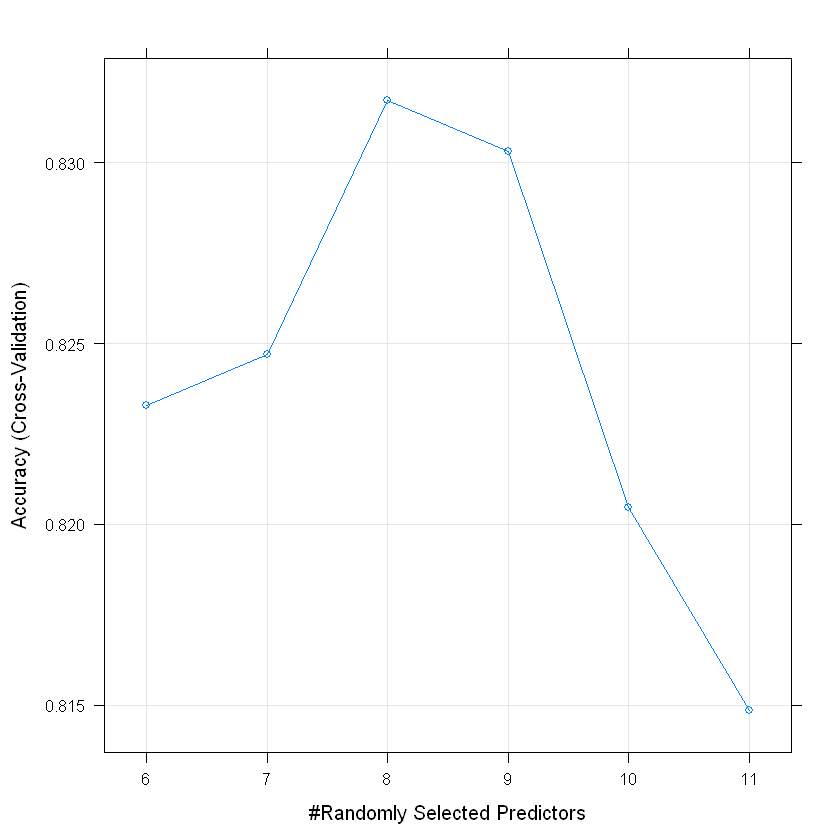

In [160]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.mtry=c(6,7,8,9,10,11))
gridSearch <- train(label~., data=train_set, method='rf',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 4: GLMNET

In [161]:
# default
fit.glmnet

glmnet 

713 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 570, 570, 570, 571, 571 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.10   0.0005353096  0.8148528  0.6034754
  0.10   0.0053530957  0.8162612  0.6061322
  0.10   0.0535309567  0.8050034  0.5790111
  0.55   0.0005353096  0.8148528  0.6034754
  0.55   0.0053530957  0.8148429  0.6030374
  0.55   0.0535309567  0.7895597  0.5489558
  1.00   0.0005353096  0.8148528  0.6034754
  1.00   0.0053530957  0.8120359  0.5965211
  1.00   0.0535309567  0.7895597  0.5489558

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were alpha = 0.1 and lambda = 0.005353096.

glmnet 

713 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 570, 570, 570, 571, 571 
Resampling results across tuning parameters:

  alpha  lambda       Accuracy   Kappa    
  0.0    0.000000000  0.8134443  0.5998473
  0.0    0.003000000  0.8134443  0.5998473
  0.0    0.004000000  0.8134443  0.5998473
  0.0    0.005353096  0.8134443  0.5998473
  0.0    0.006000000  0.8134443  0.5998473
  0.0    0.007000000  0.8134443  0.5998473
  0.0    0.100000000  0.8162415  0.6016056
  0.1    0.000000000  0.8148528  0.6034754
  0.1    0.003000000  0.8148528  0.6034754
  0.1    0.004000000  0.8148528  0.6034754
  0.1    0.005353096  0.8162612  0.6061322
  0.1    0.006000000  0.8148528  0.6029203
  0.1    0.007000000  0.8162514  0.6056943
  0.1    0.100000000  0.8007978  0.5649705
  0.5    0.000000000  0.8148528  0.6034754
  0.5    0.003000000  0.8134443  0.6002635
  0.5    0.004000000  0.8148528  0.6029203
  0.5    0.0053

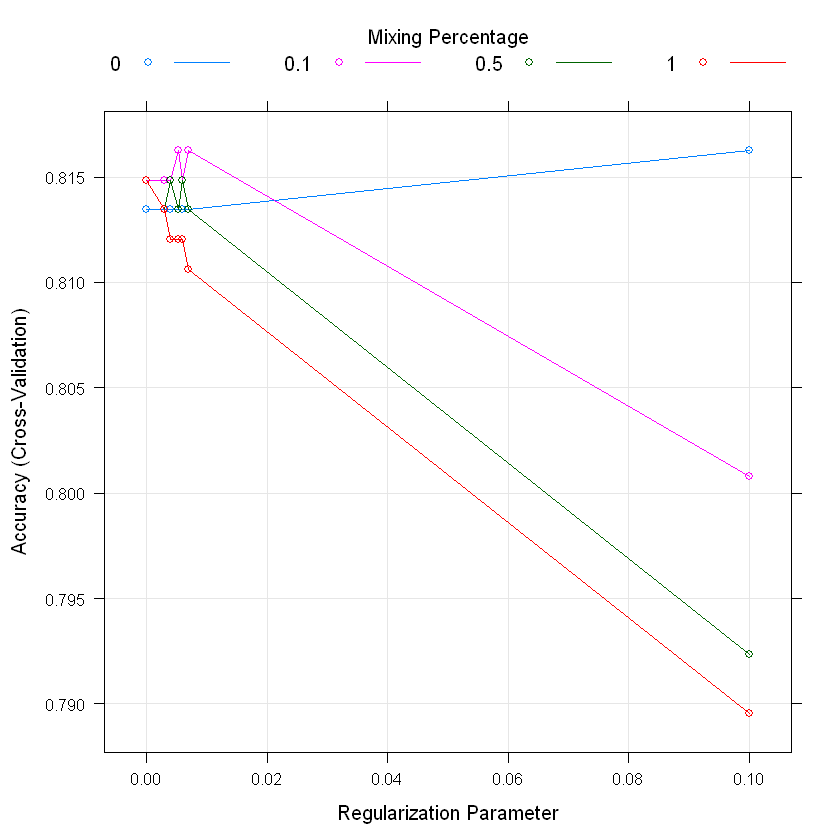

In [162]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(alpha = c(0,0.1,0.5,1),
                       lambda = c(0,0.003,0.004,0.005353096,0.006,0.007,0.1))                       
gridSearch <- train(label~., data=train_set, method='glmnet',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

## Final Model: Random Forest

#### Params: mtry=8

In [168]:
library(randomForest)
final.model <- randomForest(label~., data=train_set, mtry=8,
                           importance=TRUE)
print(final.model)


Call:
 randomForest(formula = label ~ ., data = train_set, mtry = 8,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 18.65%
Confusion matrix:
    0   1 class.error
0 376  63   0.1435080
1  70 204   0.2554745


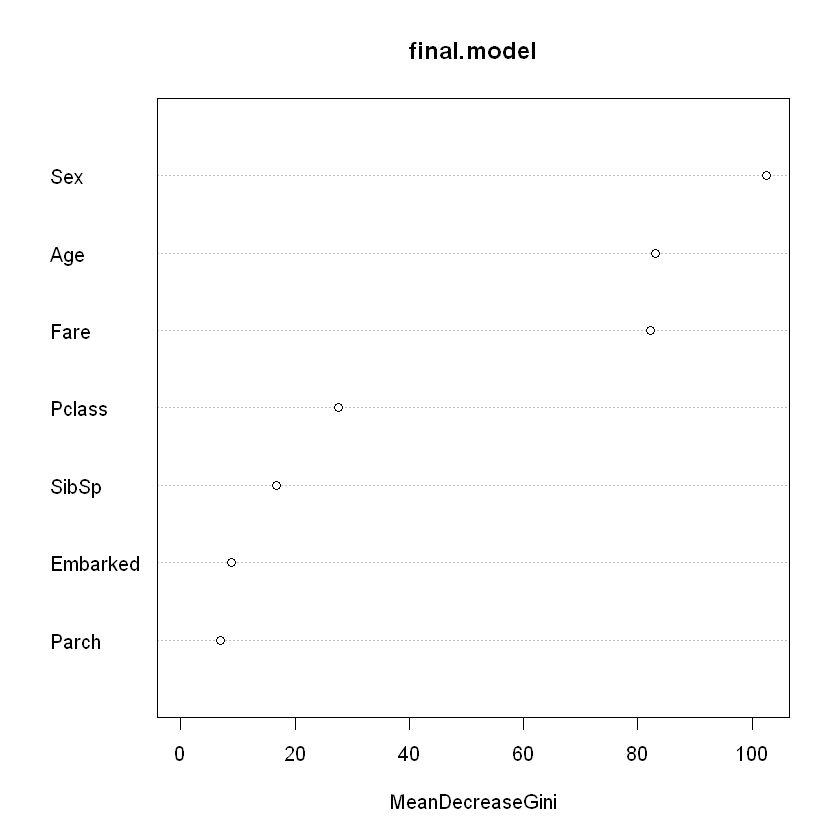

In [175]:
# Feature Importance
varImpPlot(final.model,type=2)

#### Save and load the final model

In [164]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [165]:
# load the model
final.model <- readRDS('final_model.rds')
print(final.model)


Call:
 randomForest(formula = label ~ ., data = train_set, mtry = 8) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 18.37%
Confusion matrix:
    0   1 class.error
0 377  62   0.1412301
1  69 205   0.2518248


** Final Model Evaluation with Test set **

In [166]:
predictions = predict(final.model, newdata = test_set[-label_col])
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 97 23
         1 13 45
                                          
               Accuracy : 0.7978          
                 95% CI : (0.7312, 0.8541)
    No Information Rate : 0.618           
    P-Value [Acc > NIR] : 1.939e-07       
                                          
                  Kappa : 0.5593          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 0.8818          
            Specificity : 0.6618          
         Pos Pred Value : 0.8083          
         Neg Pred Value : 0.7759          
             Prevalence : 0.6180          
         Detection Rate : 0.5449          
   Detection Prevalence : 0.6742          
      Balanced Accuracy : 0.7718          
                                          
       'Positive' Class : 0               
                                          

## Summary

- Best model: **RandomForest** w/ param: mtry=8

- Accuracy of test set: **79.8%**